In [412]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from warnings import filterwarnings
filterwarnings(action='ignore')

In [343]:
p_plant=pd.read_csv('database_IND.csv')

In [344]:
p_plant

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [345]:
p_plant.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [346]:
p_plant.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Explanatory Data Analysis

In [347]:
p_plant.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [348]:
p_plant.shape

(907, 27)

In [349]:
#finding null values
p_plant.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [350]:
p_plant['other_fuel1'].value_counts()

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [351]:
p_plant['other_fuel2'].value_counts()

Oil    1
Name: other_fuel2, dtype: int64

In [352]:
p_plant['other_fuel3'].value_counts()

Series([], Name: other_fuel3, dtype: int64)

In [353]:
#dropping the unnecessary columns
p_plant=p_plant.drop(columns='country',axis=1)
p_plant=p_plant.drop(columns='country_long',axis=1)
p_plant=p_plant.drop(columns='name',axis=1)
p_plant=p_plant.drop(columns='geolocation_source',axis=1)
p_plant=p_plant.drop(columns='source',axis=1)
p_plant=p_plant.drop(columns='url',axis=1)
p_plant=p_plant.drop(columns='owner',axis=1)
p_plant=p_plant.drop(columns='generation_data_source',axis=1)
p_plant=p_plant.drop(columns='gppd_idnr',axis=1)
p_plant=p_plant.drop(columns='other_fuel3',axis=1)
p_plant=p_plant.drop(columns='other_fuel1',axis=1)
p_plant=p_plant.drop(columns='other_fuel2',axis=1)




In [597]:
#filling Null Values
p_plant.fillna(p_plant.median()[0].mean(),inplace=True)


In [355]:
#finding null values
p_plant.isna().sum()

capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
commissioning_year          0
wepp_id                     0
year_of_capacity_data       0
generation_gwh_2013         0
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_gwh_2018         0
generation_gwh_2019         0
estimated_generation_gwh    0
dtype: int64

In [356]:
p_plant

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
0,2.5,28.1839,73.2407,Solar,2011.0,59.2,59.2,59.2,59.200000,59.200000,59.200000,59.200000,59.200000,59.2,59.2
1,98.0,24.7663,74.6090,Coal,59.2,59.2,59.2,59.2,59.200000,59.200000,59.200000,59.200000,59.200000,59.2,59.2
2,39.2,21.9038,69.3732,Wind,59.2,59.2,59.2,59.2,59.200000,59.200000,59.200000,59.200000,59.200000,59.2,59.2
3,135.0,23.8712,91.3602,Gas,2004.0,59.2,2019.0,59.2,617.789264,843.747000,886.004428,663.774500,626.239128,59.2,59.2
4,1800.0,21.9603,82.4091,Coal,2015.0,59.2,2019.0,59.2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,59.2,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016.0,59.2,2019.0,59.2,59.200000,0.994875,233.596650,865.400000,686.500000,59.2,59.2
903,3.0,12.8932,78.1654,Solar,59.2,59.2,59.2,59.2,59.200000,59.200000,59.200000,59.200000,59.200000,59.2,59.2
904,25.5,15.2758,75.5811,Wind,59.2,59.2,59.2,59.2,59.200000,59.200000,59.200000,59.200000,59.200000,59.2,59.2
905,80.0,24.3500,73.7477,Coal,59.2,59.2,59.2,59.2,59.200000,59.200000,59.200000,59.200000,59.200000,59.2,59.2


In [357]:
p_plant.keys()

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'estimated_generation_gwh'],
      dtype='object')

In [358]:
p_plant['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [359]:
from sklearn import preprocessing
a=preprocessing.LabelEncoder()
p_plant['primary_fuel']=a.fit_transform(p_plant['primary_fuel'])

# Statistical Summary

In [360]:
p_plant.describe()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,907.000000,907.000000,907.000000,907.000000,9.070000e+02,907.000000,9.070000e+02,907.000000,907.000000,907.000000,907.000000,907.000000,9.070000e+02,9.070000e+02
mean,326.223755,23.125256,76.538572,3.206174,1185.185226,5.920000e+01,1180.629107,5.920000e+01,1100.329205,1161.437454,1211.781915,1266.439354,1314.589897,5.920000e+01,5.920000e+01
std,590.085456,10.322840,6.263960,2.280652,956.750996,8.246843e-13,970.160420,8.246843e-13,2914.072352,3094.143089,3119.562531,3175.490873,3286.682207,8.246843e-13,8.246843e-13
min,0.000000,8.168900,59.200000,0.000000,59.200000,5.920000e+01,59.200000,5.920000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,5.920000e+01,5.920000e+01
25%,16.725000,17.072000,73.811550,1.000000,59.200000,5.920000e+01,59.200000,5.920000e+01,59.200000,59.200000,59.200000,59.200000,59.200000,5.920000e+01,5.920000e+01
50%,59.200000,22.142100,76.493800,3.000000,1978.000000,5.920000e+01,2019.000000,5.920000e+01,59.200000,59.200000,59.200000,59.200000,59.200000,5.920000e+01,5.920000e+01
75%,385.250000,26.753750,79.206100,6.000000,2003.000000,5.920000e+01,2019.000000,5.920000e+01,556.562750,598.926350,670.039394,709.290725,687.754000,5.920000e+01,5.920000e+01
max,4760.000000,59.200000,95.408000,7.000000,2018.000000,5.920000e+01,2019.000000,5.920000e+01,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,5.920000e+01,5.920000e+01


In [361]:
p_plant.mean()

capacity_mw                  326.223755
latitude                      23.125256
longitude                     76.538572
primary_fuel                   3.206174
commissioning_year          1185.185226
wepp_id                       59.200000
year_of_capacity_data       1180.629107
generation_gwh_2013           59.200000
generation_gwh_2014         1100.329205
generation_gwh_2015         1161.437454
generation_gwh_2016         1211.781915
generation_gwh_2017         1266.439354
generation_gwh_2018         1314.589897
generation_gwh_2019           59.200000
estimated_generation_gwh      59.200000
dtype: float64

# Finding Skewness

In [374]:
p_plant.skew()

capacity_mw                 3.123576
latitude                    1.940249
longitude                  -0.295883
primary_fuel                0.472251
commissioning_year         -0.328473
wepp_id                     0.000000
year_of_capacity_data      -0.292409
generation_gwh_2013         0.000000
generation_gwh_2014         5.018549
generation_gwh_2015         5.292321
generation_gwh_2016         5.014692
generation_gwh_2017         5.010509
generation_gwh_2018         4.874039
generation_gwh_2019         0.000000
estimated_generation_gwh    0.000000
dtype: float64

# Correlation

In [362]:
p_plant.corr()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
capacity_mw,1.000000,-0.053917,0.216974,-0.380395,0.414775,NaN,0.417896,NaN,0.814674,0.841468,0.875369,0.892899,0.905488,NaN,NaN
latitude,-0.053917,1.000000,-0.500920,0.096464,0.088458,NaN,0.052227,NaN,-0.029067,-0.030007,-0.031473,-0.024888,-0.028212,NaN,NaN
longitude,0.216974,-0.500920,1.000000,-0.348476,0.294825,NaN,0.323940,NaN,0.160584,0.170438,0.186348,0.199703,0.199273,NaN,NaN
primary_fuel,-0.380395,0.096464,-0.348476,1.000000,-0.481713,NaN,-0.500558,NaN,-0.282791,-0.288032,-0.300822,-0.310594,-0.312084,NaN,NaN
commissioning_year,0.414775,0.088458,0.294825,-0.481713,1.000000,NaN,0.981702,NaN,0.304853,0.304534,0.316274,0.325603,0.327190,NaN,NaN
wepp_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_capacity_data,0.417896,0.052227,0.323940,-0.500558,0.981702,NaN,1.000000,NaN,0.309084,0.308181,0.319632,0.328893,0.330440,NaN,NaN
generation_gwh_2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,0.814674,-0.029067,0.160584,-0.282791,0.304853,NaN,0.309084,NaN,1.000000,0.966673,0.937892,0.907541,0.898658,NaN,NaN
generation_gwh_2015,0.841468,-0.030007,0.170438,-0.288032,0.304534,NaN,0.308181,NaN,0.966673,1.000000,0.974653,0.943781,0.936566,NaN,NaN


# Feature Engineering

In [363]:
x=p_plant.drop(columns=['primary_fuel'],axis=1)
print(x)

     capacity_mw  latitude  longitude  commissioning_year  wepp_id  \
0            2.5   28.1839    73.2407              2011.0     59.2   
1           98.0   24.7663    74.6090                59.2     59.2   
2           39.2   21.9038    69.3732                59.2     59.2   
3          135.0   23.8712    91.3602              2004.0     59.2   
4         1800.0   21.9603    82.4091              2015.0     59.2   
..           ...       ...        ...                 ...      ...   
902       1600.0   16.2949    77.3568              2016.0     59.2   
903          3.0   12.8932    78.1654                59.2     59.2   
904         25.5   15.2758    75.5811                59.2     59.2   
905         80.0   24.3500    73.7477                59.2     59.2   
906         16.5    9.9344    77.4768                59.2     59.2   

     year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
0                     59.2                 59.2            59.200000   
1              

In [364]:
y=p_plant['primary_fuel']
print(y)

0      6
1      1
2      7
3      2
4      1
      ..
902    1
903    6
904    7
905    1
906    7
Name: primary_fuel, Length: 907, dtype: int32


# Data Visualization

<Figure size 800x700 with 0 Axes>

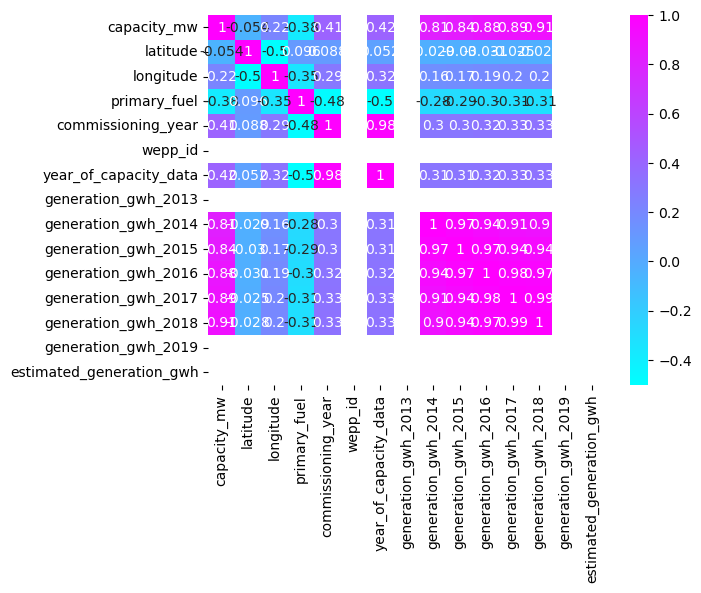

<Figure size 800x700 with 0 Axes>

In [249]:
corr_hmap = p_plant.corr()
sns.heatmap(corr_hmap,annot=True,cmap='cool')
plt.figure(figsize=(8,7))

# Univariate Analysis

# Count Plot

<function matplotlib.pyplot.show(close=None, block=None)>

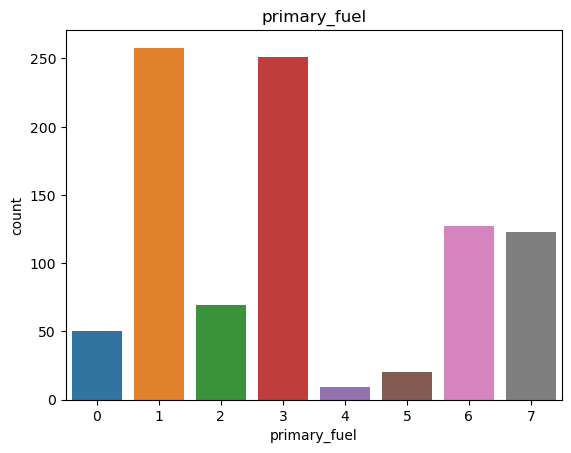

In [250]:
sns.countplot(x ='primary_fuel', data = p_plant)
plt.title('primary_fuel')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

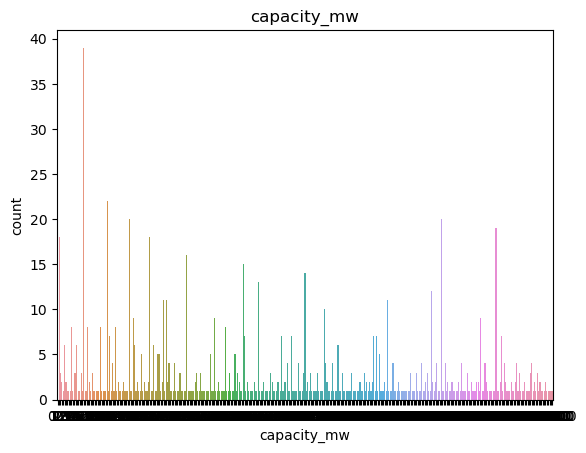

In [251]:
sns.countplot(x ='capacity_mw', data = p_plant)
plt.title('capacity_mw')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

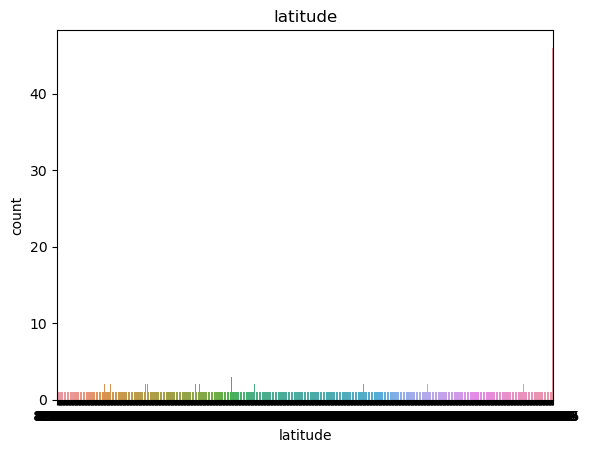

In [254]:
sns.countplot(x ='latitude', data = p_plant)
plt.title('latitude')
plt.show

# Dist Plot

<function matplotlib.pyplot.show(close=None, block=None)>

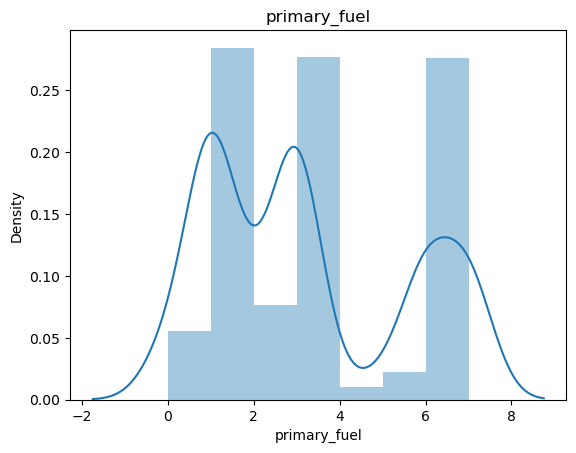

In [255]:
sns.distplot(p_plant['primary_fuel'])
plt.title('primary_fuel')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

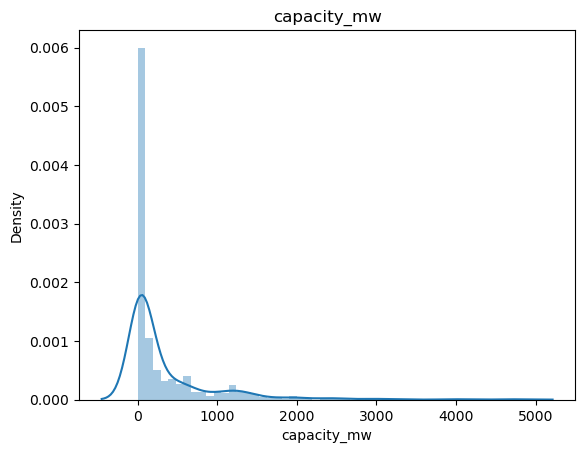

In [256]:
sns.distplot(p_plant['capacity_mw'])
plt.title('capacity_mw')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

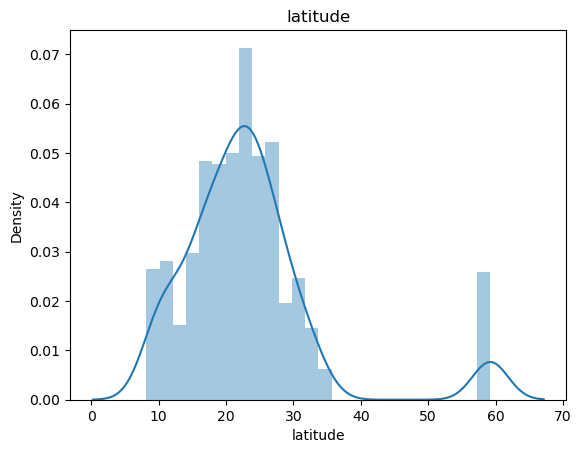

In [257]:
sns.distplot(p_plant['latitude'])
plt.title('latitude')
plt.show

# KDE Plot

<Axes: xlabel='primary_fuel', ylabel='Density'>

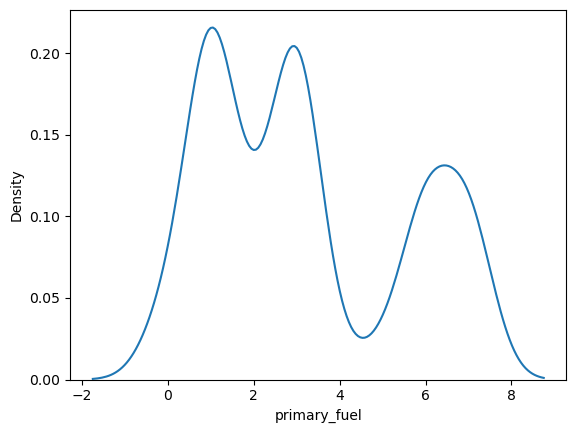

In [258]:
sns.kdeplot(data = p_plant.primary_fuel)

<Axes: xlabel='capacity_mw', ylabel='Density'>

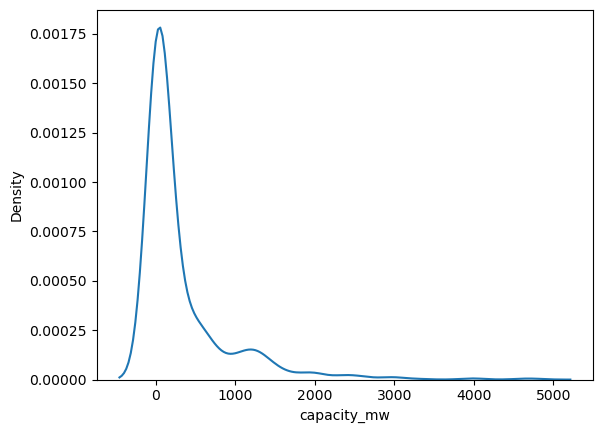

In [259]:
sns.kdeplot(data = p_plant.capacity_mw)

# Bivariate Analysis

# Bar Plot

<Axes: xlabel='primary_fuel', ylabel='capacity_mw'>

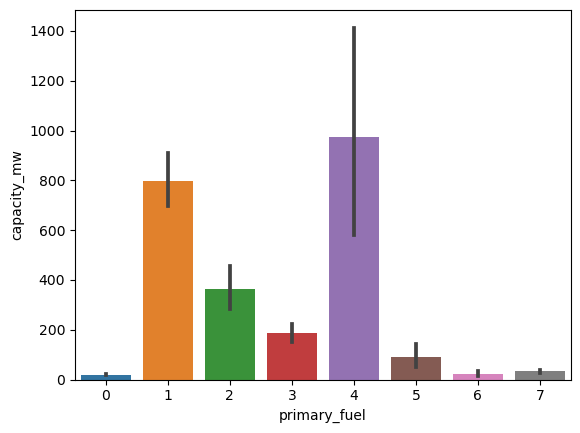

In [260]:
sns.barplot(x='primary_fuel',y='capacity_mw',data=p_plant)

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2019'>

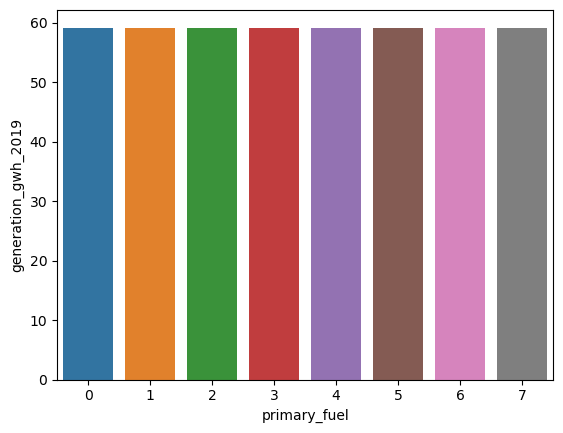

In [261]:
sns.barplot(x='primary_fuel',y='generation_gwh_2019',data=p_plant)

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2019'>

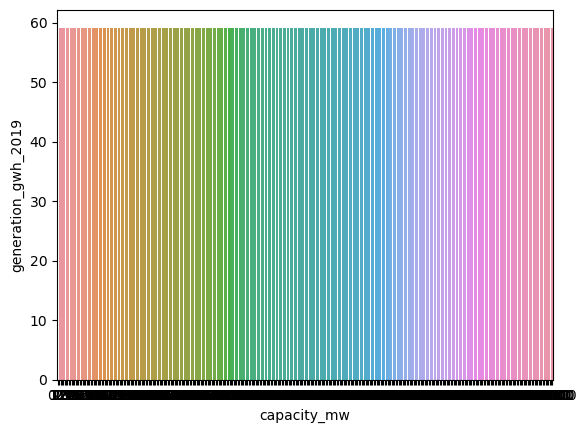

In [262]:
sns.barplot(x='capacity_mw',y='generation_gwh_2019',data=p_plant)

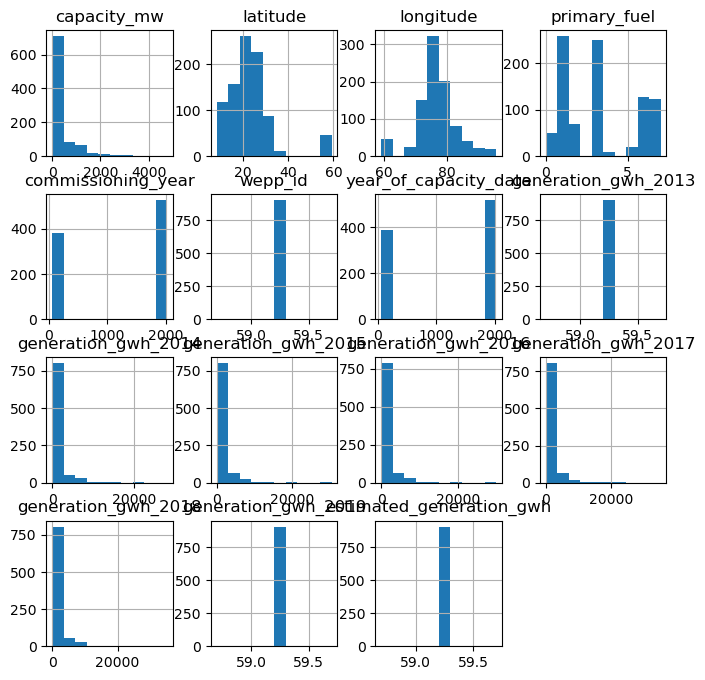

In [263]:
p_plant.hist(figsize=(8,8),bins=10)
plt.show()

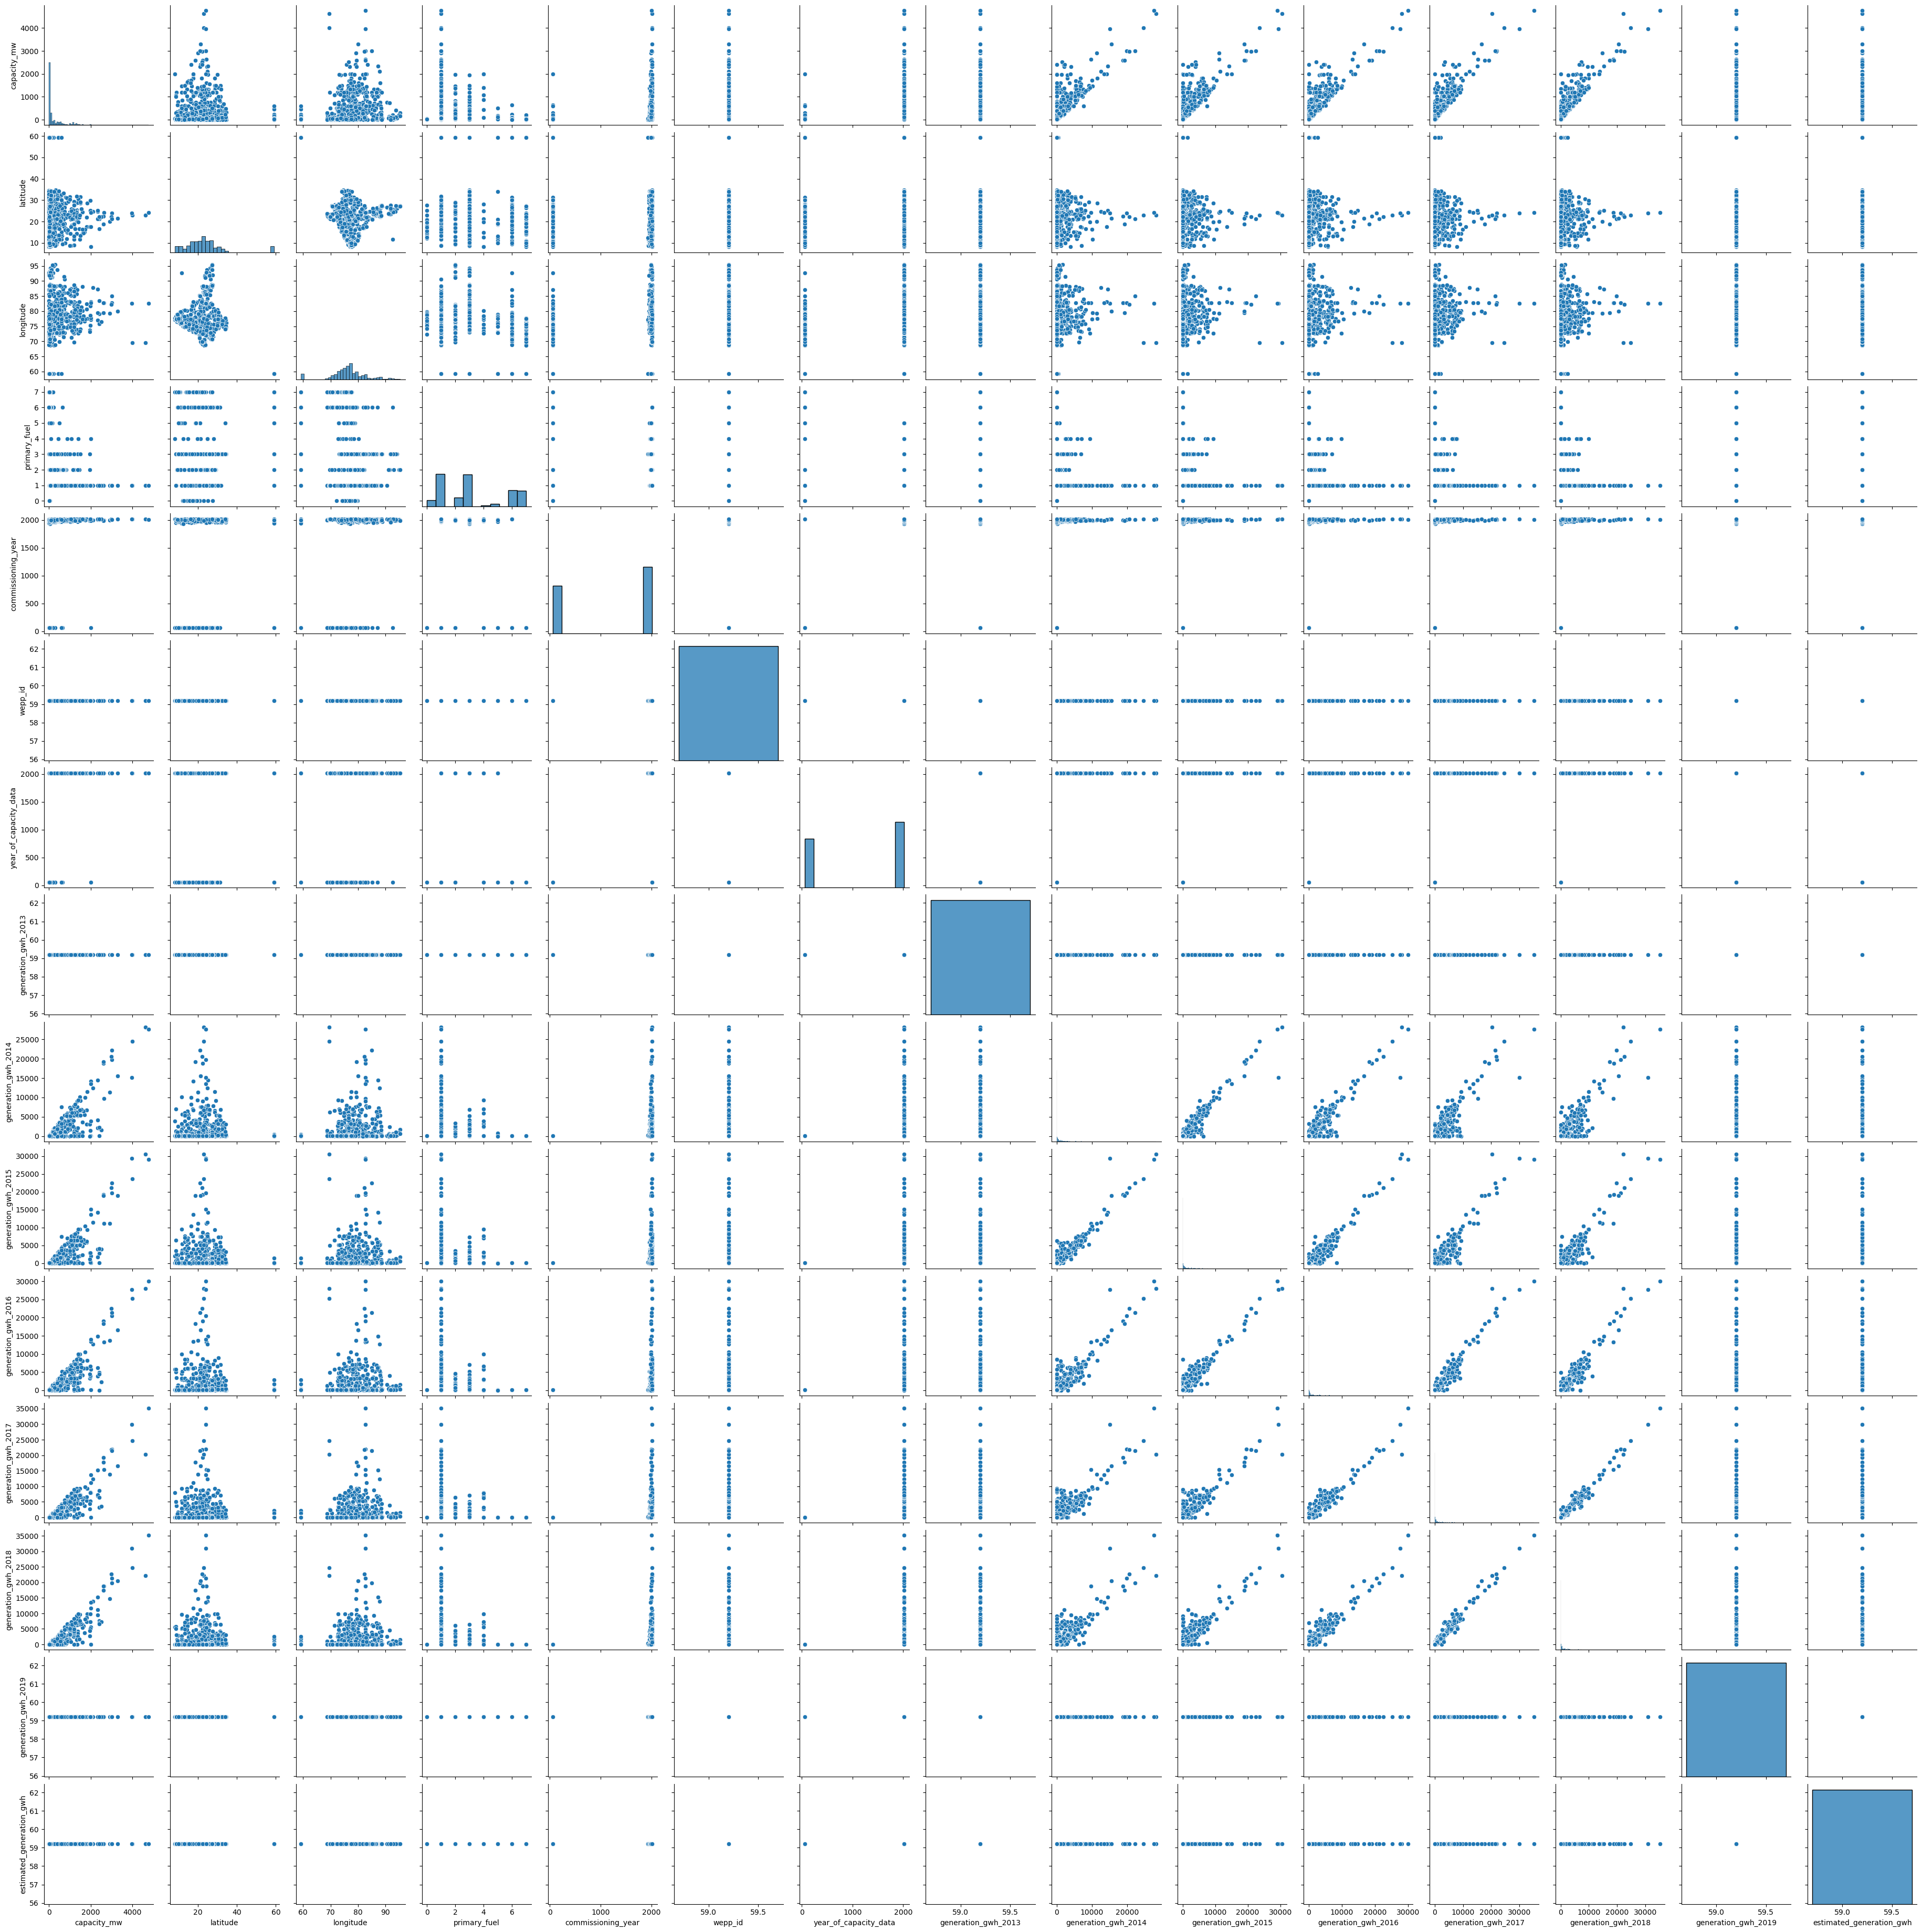

In [264]:
sns.pairplot(p_plant)

# Scatter Plot

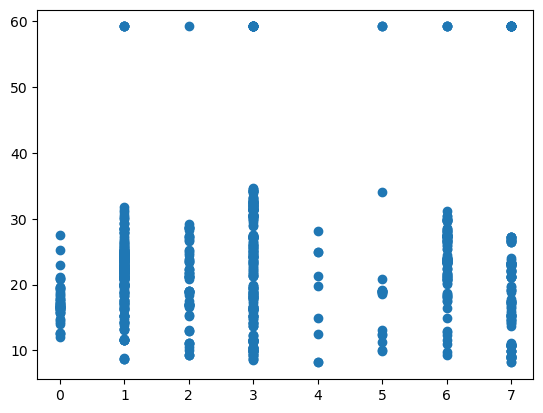

In [265]:
plt.scatter(p_plant['primary_fuel'],p_plant['latitude'])
plt.show()

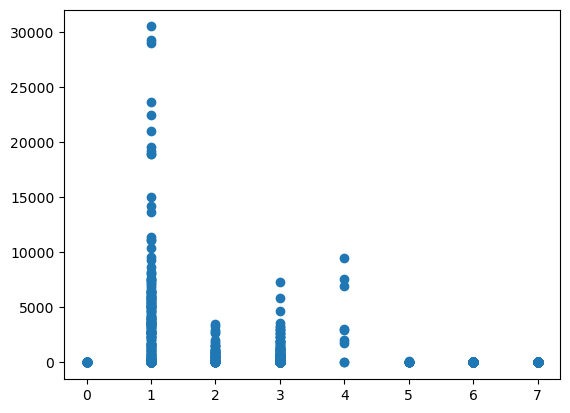

In [266]:
plt.scatter(p_plant['primary_fuel'],p_plant['generation_gwh_2015'])
plt.show()

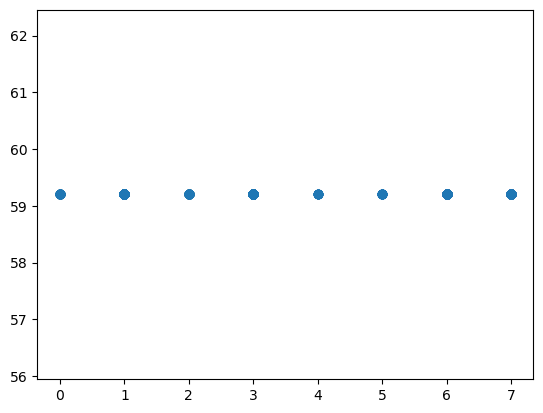

In [267]:
plt.scatter(p_plant['primary_fuel'],p_plant['generation_gwh_2019'])
plt.show()

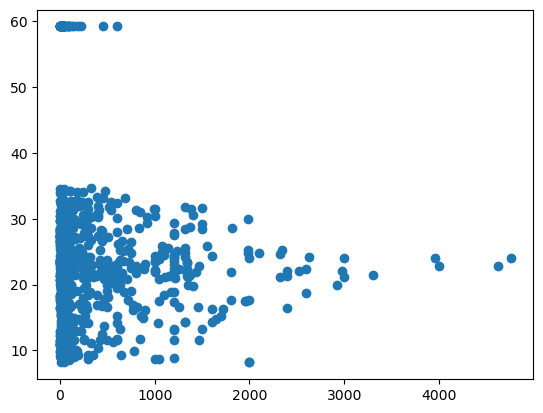

In [268]:
plt.scatter(p_plant['capacity_mw'],p_plant['latitude'])
plt.show()

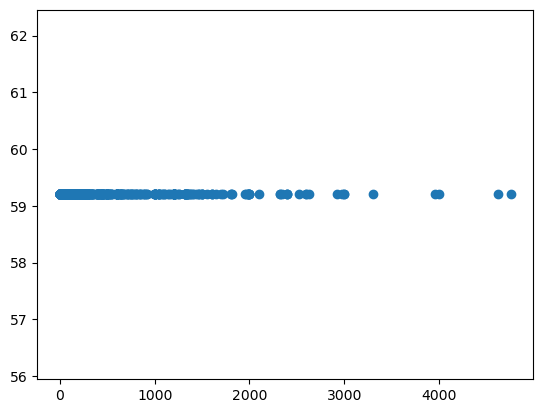

In [269]:
plt.scatter(p_plant['capacity_mw'],p_plant['generation_gwh_2019'])
plt.show()

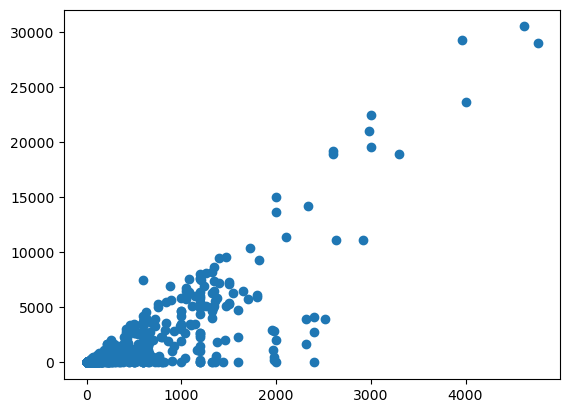

In [270]:
plt.scatter(p_plant['capacity_mw'],p_plant['generation_gwh_2015'])
plt.show()

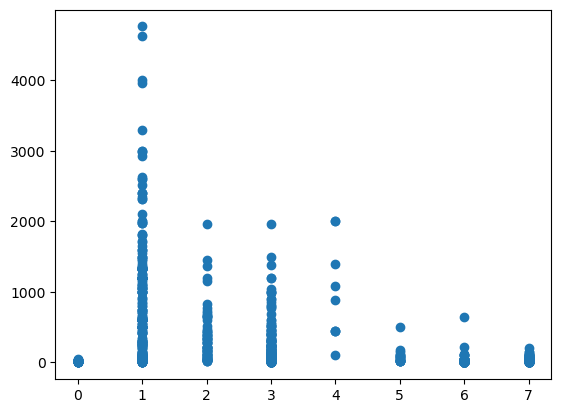

In [271]:
plt.scatter(p_plant['primary_fuel'],p_plant['capacity_mw'])
plt.show()

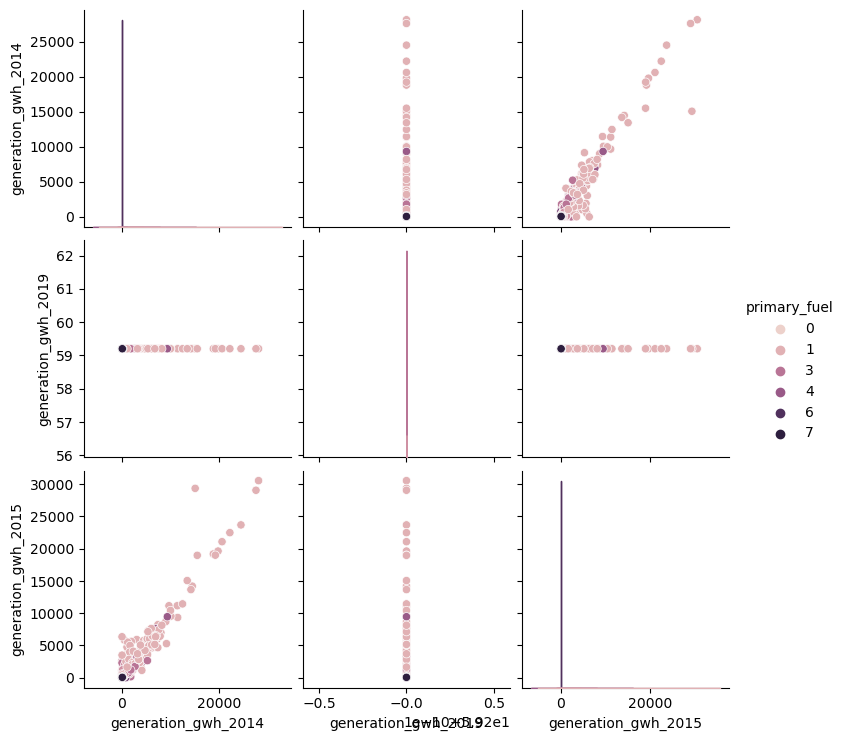

In [275]:
sns.pairplot(data=p_plant,hue='primary_fuel',vars=['generation_gwh_2014','generation_gwh_2019','generation_gwh_2015'])

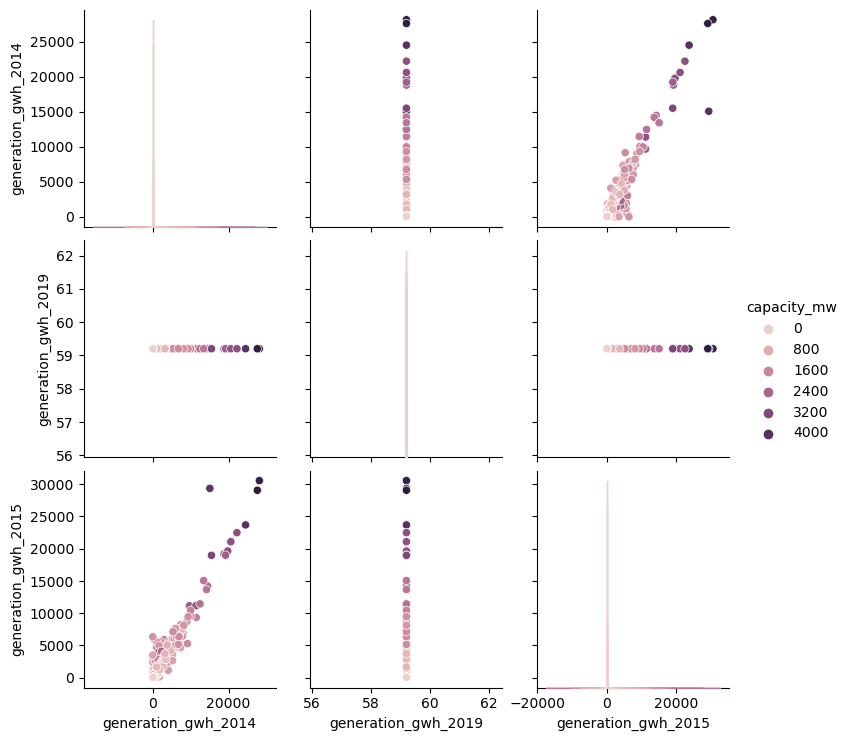

In [276]:
sns.pairplot(data=p_plant,hue='capacity_mw',vars=['generation_gwh_2014','generation_gwh_2019','generation_gwh_2015'])

# Joint plot

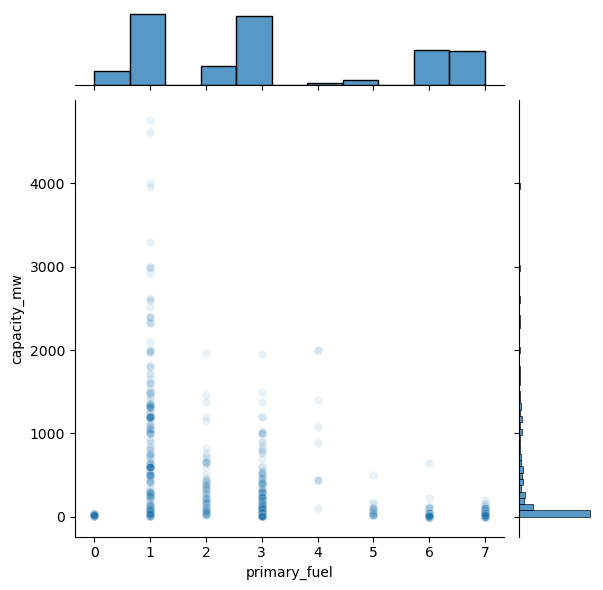

In [277]:
from scipy.stats import pearsonr
sns.jointplot(x='primary_fuel', y='capacity_mw', data=p_plant, alpha = 0.1)

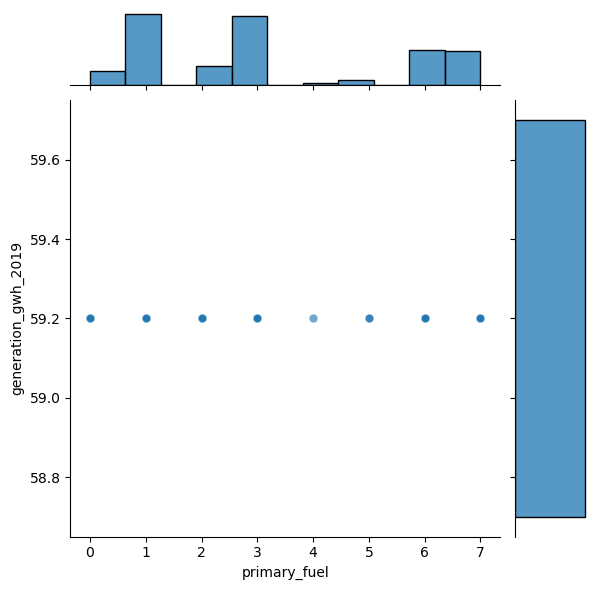

In [278]:
from scipy.stats import pearsonr
sns.jointplot(x='primary_fuel', y='generation_gwh_2019', data=p_plant, alpha = 0.1)

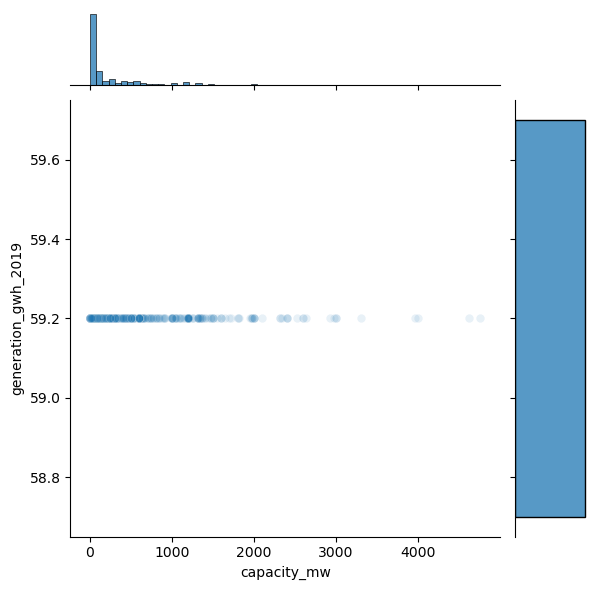

In [279]:
sns.jointplot(x='capacity_mw', y='generation_gwh_2019', data=p_plant, alpha = 0.1)

# Box Plot

capacity_mw                    Axes(0.125,0.747241;0.133621x0.132759)
latitude                    Axes(0.285345,0.747241;0.133621x0.132759)
longitude                    Axes(0.44569,0.747241;0.133621x0.132759)
primary_fuel                Axes(0.606034,0.747241;0.133621x0.132759)
commissioning_year          Axes(0.766379,0.747241;0.133621x0.132759)
wepp_id                        Axes(0.125,0.587931;0.133621x0.132759)
year_of_capacity_data       Axes(0.285345,0.587931;0.133621x0.132759)
generation_gwh_2013          Axes(0.44569,0.587931;0.133621x0.132759)
generation_gwh_2014         Axes(0.606034,0.587931;0.133621x0.132759)
generation_gwh_2015         Axes(0.766379,0.587931;0.133621x0.132759)
generation_gwh_2016            Axes(0.125,0.428621;0.133621x0.132759)
generation_gwh_2017         Axes(0.285345,0.428621;0.133621x0.132759)
generation_gwh_2018          Axes(0.44569,0.428621;0.133621x0.132759)
generation_gwh_2019         Axes(0.606034,0.428621;0.133621x0.132759)
estimated_generation

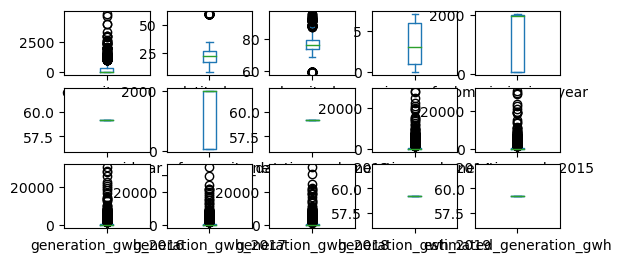

In [381]:
p_plant.plot(kind='box',subplots=True,layout=(5,5))

# Training The Data

In [365]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [366]:
x_train.shape

(634, 14)

In [367]:
y_train.shape

(634,)

In [368]:
x_test.shape

(273, 14)

In [369]:
y_train.shape

(634,)

In [370]:
y_test.shape

(273,)

# Fitting The Model

In [371]:
lm=LinearRegression()

In [372]:
lm.fit(x_train,y_train)

LinearRegression()

In [373]:
lm.coef_

array([-8.94110922e-04,  2.92016081e-04, -6.91229936e-02,  4.09629380e-04,
        2.94902991e-17, -1.23801348e-03, -2.53269627e-16,  7.11291638e-05,
       -1.09739195e-04,  5.03888598e-05, -6.05105535e-05,  7.94520951e-05,
        0.00000000e+00,  0.00000000e+00])

In [382]:
lm.intercept_

9.67087204639666

In [383]:
lm.score(x_train,y_train)

0.31097915719427804

In [384]:
#predict the value
pred=lm.predict(x_test)
print("Predicted result:",pred)
print("actual result:",y_test)

Predicted result: [ 2.43272315  4.75840971  2.41669642  1.94655758  3.9098962   4.27683346
  2.62333238  4.25386335  1.24223333  4.46441097  4.43875958  4.46157028
  5.54438593  4.14760693  2.3218294   4.73122356  4.2735232   2.42249764
  2.31977768  2.58209246  4.68924127  4.76039241  3.21411566  2.50731887
  4.44614971  5.52413432  1.27494078  4.63516952  4.12578851  4.57534107
  2.09587333  2.2164538   2.42446424  1.22043347  2.58841176  1.9964868
  2.58180937  1.58462008  2.89152098  4.09395815  4.33377339  2.25436962
  2.75193921  2.59258108  4.2634497   2.42190228  2.62904846  4.43628225
  1.14713027  4.49458148  4.22076313  2.79806153  4.31825037  1.56015455
  4.7221243   3.89325612  4.12515513  4.26060841  1.26614492  2.68489498
  4.57479565  1.30141681  4.22126202  2.08236122  4.32589532  4.36126756
  2.85761149  4.74449358  4.4007374   1.18419164  3.89827482  4.47509287
  3.85822856  2.61999253  1.31233211  1.46295266  2.52716091  1.62297352
  2.63269216  2.42760945  3.883190

In [385]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 1.416721083035651
Mean squared error: 3.2343052491732682
Root mean squared error: 1.7984174290673642


In [386]:
#change coming in y whenever x is being changed
print(r2_score(y_test,pred))

0.3403601935395003


In [387]:
knn=KNeighborsRegressor()

In [388]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [502]:
predknn=knn.predict(x_test)

In [503]:
knn.score(x_train,y_train)

0.8841769650357573

In [504]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predknn))
print('Mean squared error:',mean_squared_error(y_test,predknn))
print('r2 score',(r2_score(y_test,predknn)))

error:
Mean absolute error: 122.75476263736263
Mean squared error: 58073.30518911341
r2 score 0.8373379784721385


In [505]:
svm=SVR()

In [506]:
svm.fit(x_train,y_train)

SVR()

In [507]:
predsvm=svm.predict(x_test)

In [508]:
svm.score(x_train,y_train)

-0.05450151383610269

In [509]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predsvm))
print('Mean squared error:',mean_squared_error(y_test,predsvm))
print('r2 score',(r2_score(y_test,predsvm)))

error:
Mean absolute error: 293.5247571553833
Mean squared error: 390337.41723345575
r2 score -0.09332632538126662


In [510]:
dtc=DecisionTreeRegressor()

In [511]:
dtc.fit(x_train,y_train)

DecisionTreeRegressor()

In [512]:
preddtc=dtc.predict(x_test)

In [513]:
dtc.score(x_train,y_train)

0.999923804249838

In [514]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,preddtc))
print('Mean squared error:',mean_squared_error(y_test,preddtc))
print('r2 score',(r2_score(y_test,preddtc)))

error:
Mean absolute error: 153.6397409257409
Mean squared error: 87330.63088088571
r2 score 0.7553888673267501


In [515]:
rfc=RandomForestRegressor()

In [516]:
rfc.fit(x_train,y_train)

RandomForestRegressor()

In [517]:
predrfc=rfc.predict(x_test)

In [518]:
rfc.score(x_train,y_train)

0.9782212079057139

In [519]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predrfc))
print('Mean squared error:',mean_squared_error(y_test,predrfc))
print('r2 score',(r2_score(y_test,predrfc)))

error:
Mean absolute error: 109.82435510537364
Mean squared error: 43588.406467471505
r2 score 0.8779098539666695


In [520]:

# Fit Lasso regression model
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)

Lasso(alpha=0.1)

In [521]:
#testing the model
pred=lasso.predict(x_test)

In [522]:
lasso.score(x_train,y_train)

0.8480860100819689

In [523]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('r2 score',(r2_score(y_test,pred)))

error:
Mean absolute error: 148.93025494218114
Mean squared error: 63321.37483341603
r2 score 0.8226382534490604


In [524]:

# Fit Ridge regression model
ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)

Ridge(alpha=0.1)

In [525]:
#testing the model
predr=ridge.predict(x_test)

In [526]:
ridge.score(x_train,y_train)

0.8480860213527929

In [527]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predr))
print('Mean squared error:',mean_squared_error(y_test,predr))
print('r2 score',(r2_score(y_test,predr)))

error:
Mean absolute error: 148.9401349186651
Mean squared error: 63321.402727073095
r2 score 0.8226381753195544


# Cross Validation Score

In [528]:
#for comparing the score of different models
from sklearn.model_selection import KFold, cross_val_score
k_folds=KFold(n_splits=5)
score=cross_val_score(lm,x_train,y_train,cv=k_folds)

In [529]:
print('The Best score for Linear Model is',score.mean())


The Best score for Linear Model is 0.8176126114320912


In [530]:
k_folds=KFold(n_splits=5)
score=cross_val_score(dtc,x_train,y_train,cv=k_folds)
print('The Best score for Decision Tree Regressor is',score.mean())

The Best score for Decision Tree Regressor is 0.7498389321345036


In [531]:
k_folds=KFold(n_splits=5)
score=cross_val_score(rfc,x_train,y_train,cv=k_folds)
print('The Best score for Random Forest Regressor is',score.mean())

The Best score for Random Forest Regressor is 0.8388416299186499


In [532]:
k_folds=KFold(n_splits=5)
score=cross_val_score(svm,x_train,y_train,cv=k_folds)
print('The Best score for SVR is',score.mean())

The Best score for SVR is -0.08567442691598126


In [533]:
k_folds=KFold(n_splits=5)
score=cross_val_score(knn,x_train,y_train,cv=k_folds)
print('The Best score for K Neighbour Regressor is',score.mean())

The Best score for K Neighbour Regressor is 0.8062941773801502


In [534]:
k_folds=KFold(n_splits=5)
score=cross_val_score(lasso,x_train,y_train,cv=k_folds)
print('The Best score for Lasso is',score.mean())

The Best score for Lasso is 0.817610550415831


In [535]:
k_folds=KFold(n_splits=5)
score=cross_val_score(ridge,x_train,y_train,cv=k_folds)
print('The Best score for Ridge is',score.mean())

The Best score for Ridge is 0.8176125667067371


# Hyper parameter Tuning The Best Model

In [536]:
#estimating the parameters
param_grid={'n_estimators':[20,30],'max_features':['auto','sqrt'],'min_samples_split':[3,6],'min_samples_leaf':[7,9],'bootstrap':[True,False]}
           

In [537]:
from sklearn.model_selection import RandomizedSearchCV
rfc_random=RandomizedSearchCV(estimator=rfc,param_distributions=param_grid,n_iter=50,verbose=1,cv=5,random_state=42,n_jobs=2)

In [538]:
rfc_cv=RandomizedSearchCV(RandomForestRegressor(),param_grid,cv=5)
rfc_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [7, 9],
                                        'min_samples_split': [3, 6],
                                        'n_estimators': [20, 30]})

In [539]:
print('Best Parameters',rfc_cv.best_params_)
print('Best Score',rfc_cv.best_score_)

Best Parameters {'n_estimators': 20, 'min_samples_split': 3, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'bootstrap': False}
Best Score 0.8279868983062851


In [540]:
r_fit=RandomForestRegressor(n_estimators= 20, min_samples_split= 3, min_samples_leaf= 7, max_features='auto', bootstrap=True)

In [541]:
r_fit.fit(x_train,y_train)

RandomForestRegressor(max_features='auto', min_samples_leaf=7,
                      min_samples_split=3, n_estimators=20)

In [542]:
df=pd.DataFrame({'Actual Data':y_test,'predicted Data':r_fit.predict(x_test)})

In [543]:
df

,Actual Data,predicted Data
154,221.0,11.321724
802,30.0,66.981791
510,440.0,655.876699
352,1260.0,937.433316
355,20.0,22.149176
...,...,...
474,840.0,1263.273211
792,1400.0,2115.484784
562,51.0,50.860786
103,750.0,866.689161


# Feature Engineering for Capacity_mw

In [544]:
x=p_plant.drop(columns=['capacity_mw'],axis=1)
print(x)

     latitude  longitude  primary_fuel  commissioning_year  wepp_id  \
0     28.1839    73.2407             6              2011.0     59.2   
1     24.7663    74.6090             1                59.2     59.2   
2     21.9038    69.3732             7                59.2     59.2   
3     23.8712    91.3602             2              2004.0     59.2   
4     21.9603    82.4091             1              2015.0     59.2   
..        ...        ...           ...                 ...      ...   
902   16.2949    77.3568             1              2016.0     59.2   
903   12.8932    78.1654             6                59.2     59.2   
904   15.2758    75.5811             7                59.2     59.2   
905   24.3500    73.7477             1                59.2     59.2   
906    9.9344    77.4768             7                59.2     59.2   

     year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
0                     59.2                 59.2            59.200000   
1  

In [545]:
y=p_plant['capacity_mw']
print(y)

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 907, dtype: float64


# Training The Model

In [546]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=35)

In [547]:
x_train.shape

(634, 14)

In [548]:
y_train.shape

(634,)

In [549]:
x_test.shape

(273, 14)

In [550]:
y_test.shape

(273,)

# Fitting The Model

In [551]:
lm=LinearRegression()

In [552]:
lm.fit(x_train,y_train)

LinearRegression()

In [553]:
lm.coef_

array([-3.57331834e+00, -4.48107432e+00, -1.52011280e+01,  6.25187582e-02,
        1.49213975e-13,  9.41952048e-03,  1.33226763e-15, -2.99459268e-04,
       -2.51399121e-02,  3.14161892e-02, -5.60254517e-02,  2.01760066e-01,
        0.00000000e+00,  0.00000000e+00])

In [554]:
lm.intercept_

505.01811764288016

In [555]:
lm.score(x_train,y_train)

0.8480860213577288

In [556]:
#predict the value
pred=lm.predict(x_test)
print("Predicted result price:",pred)
print("actual price:",y_test)

Predicted result price: [ 2.26249246e+01  9.44856625e+01  5.41122856e+02  7.54047960e+02
  1.26039717e+02  1.74880811e+02  1.23514127e+02 -1.54257032e+01
  1.52988346e+02  2.76237233e+01  1.62773774e+02  3.46962608e+02
  3.22524376e+01  2.17075284e+02  5.83104649e+00  2.31489735e+02
  1.19621446e+03  2.83088733e+00  6.78024828e+02  2.65438585e+01
  1.27033243e+02  3.24700929e+01  1.95271099e+02  2.18978416e+02
  7.67070387e+01  2.37375257e+02  1.26120065e+02  1.38190983e+03
  4.80006689e+00  1.66900236e+02  9.53814459e+01  8.01770464e+00
  1.96139937e+02  3.44764923e+01  3.99307176e+02  2.56080321e+02
  2.60111348e+02  1.14371323e+02  1.24379495e+01  3.58834329e+02
  5.00480275e+02  8.54691014e+01  4.24043752e+01 -9.08392537e+00
  1.14616753e+03  7.10750447e+02  1.08496389e+03  2.35054740e+02
  2.57842838e+01  1.44661642e+01  2.21944272e+02  7.92751241e+02
  2.69896693e+02  1.46624318e+02  1.22994313e+02  6.11181829e+02
  9.62479610e+01  7.23689049e+02  1.90096957e+02  1.97524620e+01
 

In [557]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 148.94035334142035
Mean squared error: 63321.38189105094
Root mean squared error: 251.63740161401077


In [558]:
knn=KNeighborsRegressor()

In [559]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [560]:
predknn=knn.predict(x_test)

In [561]:
knn.score(x_train,y_train)

0.8841769650357573

In [562]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predknn))
print('Mean squared error:',mean_squared_error(y_test,predknn))
print('r2 score',(r2_score(y_test,predknn)))

error:
Mean absolute error: 122.75476263736263
Mean squared error: 58073.30518911341
r2 score 0.8373379784721385


In [563]:
svm=SVR()

In [564]:
svm.fit(x_train,y_train)

SVR()

In [565]:
predsvm=svm.predict(x_test)

In [566]:
svm.score(x_train,y_train)

-0.05450151383610269

In [567]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predsvm))
print('Mean squared error:',mean_squared_error(y_test,predsvm))
print('r2 score',(r2_score(y_test,predsvm)))

error:
Mean absolute error: 293.5247571553833
Mean squared error: 390337.41723345575
r2 score -0.09332632538126662


In [568]:
dtc=DecisionTreeRegressor()

In [569]:
dtc.fit(x_train,y_train)

DecisionTreeRegressor()

In [570]:
preddtc=dtc.predict(x_test)

In [571]:
dtc.score(x_train,y_train)

0.999923804249838

In [572]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,preddtc))
print('Mean squared error:',mean_squared_error(y_test,preddtc))
print('r2 score',(r2_score(y_test,preddtc)))

error:
Mean absolute error: 162.68402664002664
Mean squared error: 103140.77799333993
r2 score 0.7111050008998262


In [573]:
rfc=RandomForestRegressor()

In [574]:
rfc.fit(x_train,y_train)

RandomForestRegressor()

In [575]:
predrfc=rfc.predict(x_test)

In [576]:
rfc.score(x_train,y_train)

0.9795675171198904

In [577]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predrfc))
print('Mean squared error:',mean_squared_error(y_test,predrfc))
print('r2 score',(r2_score(y_test,predrfc)))

error:
Mean absolute error: 112.88434533892328
Mean squared error: 45036.31203343396
r2 score 0.8738543030457441


In [578]:
lasso=Lasso()

In [579]:
lasso.fit(x_train,y_train)

Lasso()

In [580]:
predl=lasso.predict(x_test)

In [581]:
lasso.score(x_train,y_train)

0.8480848937816056

In [582]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predl))
print('Mean squared error:',mean_squared_error(y_test,predl))
print('r2 score',(r2_score(y_test,predl)))

error:
Mean absolute error: 148.84170546981952
Mean squared error: 63321.64200090991
r2 score 0.8226375051189196


# Cross Validation score

In [583]:
#for comparing the score of different models
from sklearn.model_selection import KFold, cross_val_score
k_folds=KFold(n_splits=5)
score=cross_val_score(lm,x_train,y_train,cv=k_folds)
print('The Best Score for Linear Model is',score.mean())

The Best Score for Linear Model is 0.8176126114320912


In [584]:

score=cross_val_score(svm,x_train,y_train,cv=k_folds)
print('The Best Score for SVR is',score.mean())

The Best Score for SVR is -0.08567442691598126


In [585]:

score=cross_val_score(dtc,x_train,y_train,cv=k_folds)
print('The Best Score for Decision Tree Regressor is',score.mean())

The Best Score for Decision Tree Regressor is 0.7468122803633482


In [586]:

score=cross_val_score(rfc,x_train,y_train,cv=k_folds)
print('The Best Score for Random Forest Regressor is',score.mean())

The Best Score for Random Forest Regressor is 0.8357371296160213


In [587]:

score=cross_val_score(knn,x_train,y_train,cv=k_folds)
print('The Best Score for K Neighbour regressor is',score.mean())

The Best Score for K Neighbour regressor is 0.8062941773801502


In [588]:

score=cross_val_score(lasso,x_train,y_train,cv=k_folds)
print('The Best Score for Lasso is',score.mean())

The Best Score for Lasso is 0.817590732086442


# Hyper Parameter Tuning The Best Model

In [589]:
#estimating the parameters
param_grid={'n_estimators':[90,30],'max_features':['auto','sqrt'],'min_samples_split':[4,6],'min_samples_leaf':[6,9],'bootstrap':[True,False]}

In [590]:
from sklearn.model_selection import RandomizedSearchCV
rfc_random=RandomizedSearchCV(estimator=rfc,param_distributions=param_grid,n_iter=80,verbose=-1,cv=5,random_state=30,n_jobs=9)

In [591]:
rfc_cv=RandomizedSearchCV(RandomForestRegressor(),param_grid,cv=5)
rfc_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [6, 9],
                                        'min_samples_split': [4, 6],
                                        'n_estimators': [90, 30]})

In [592]:
print('Best Parameters',rfc_cv.best_params_)
print('Best Score',rfc_cv.best_score_)

Best Parameters {'n_estimators': 30, 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': False}
Best Score 0.8329908398777954


In [593]:
r_fit=RandomForestRegressor(n_estimators= 90, min_samples_split= 4, min_samples_leaf= 6, max_features='sqrt', bootstrap=False)

In [594]:
r_fit.fit(x_train,y_train)

RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_leaf=6,
                      min_samples_split=4, n_estimators=90)

In [595]:
df=pd.DataFrame({'Actual Data':y_test,'predicted Data':r_fit.predict(x_test)})

In [596]:
df

,Actual Data,predicted Data
154,221.0,14.857032
802,30.0,50.745736
510,440.0,772.068944
352,1260.0,1070.358103
355,20.0,23.719604
...,...,...
474,840.0,1181.830305
792,1400.0,1514.773673
562,51.0,44.664007
103,750.0,835.308987
